# Student Perormance Exploration
## By: Nada Ashraf

## Overvew
We will explore a dataset that consitsts of grades of 1000 students in three aspects (math, reading and writing).

This dataset is fictional [source](http://roycekimmons.com/tools/generated_data/exams) and published on [kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams) and we will use it to demonistrate the flow of exploration.

## Import packages and load dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
base_color = sb.color_palette()[0]

%matplotlib inline

In [24]:
df = pd.read_csv('StudentsPerformance.csv')

## Dataset overview

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


From the previous output we can conclude:
- Dataset contains **1000** entries and **8** features.
- Column names contain spaces that can be removed to make writing code more convenient.
- Datatypes may need some transformations.
- The non-null values for all columns equal the number of enries (**1000**) so there's no missing values.

In [27]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Cleaning

### Missing values 

In [28]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Dataset doesn't contain missing values.

### Duplicates

In [29]:
df.duplicated().sum()

0

Dataset doesn't contain duplicate data.

### Column naming
Replace spaces in column names by _ as it's more convenient in writing code.

In [30]:
df.columns = df.columns.str.replace(' ', '_')
df.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### Datatypes
Convert data in columns that contain object datatypes to category datatype.

In [31]:
category_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
for c in category_cols:
    df[c] = df[c].astype('category')

In [32]:
df.dtypes

gender                         category
race/ethnicity                 category
parental_level_of_education    category
lunch                          category
test_preparation_course        category
math_score                        int64
reading_score                     int64
writing_score                     int64
dtype: object

## Univariate analysis

In our dataset, we have 5 qualitative variables:
- gender
- race/ethnicity
- parental level of education
- lunch
- test preparation course

And 3 quantitative variables:
- math score
- reading score
- writing score

We will use **bar charts** to investigate the distribution of qualitative variables and **histograms** to plot the distribution of quantitative variables.

In [33]:
def bar_chart_with_propotions(df, col, order = None):
    # use seaborn countplot to plot bar charts
    sb.countplot(data=df, x=col, color=base_color, order=order);
    # get the current tick locations and labels
    locs, labels = plt.xticks()
    # count column values for calculating propotion
    type_counts = df[col].value_counts()
    # count values
    n = df[col].value_counts().sum()
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        # get the text property for the label to get the correct count
        count = type_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n)
        # print the annotation
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

### Gender

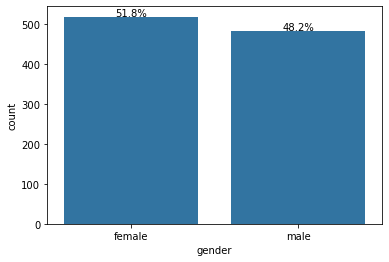

In [34]:
bar_chart_with_propotions(df, 'gender')

### race/ethnicity

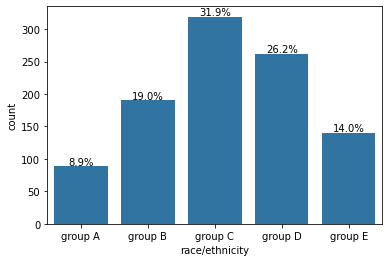

In [35]:
bar_chart_with_propotions(df, 'race/ethnicity')

### parental level of education

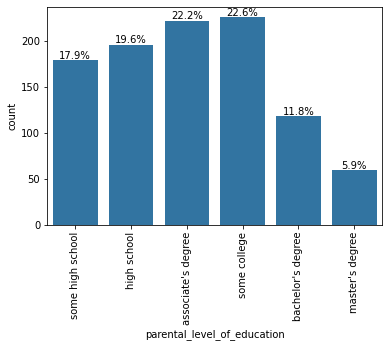

In [36]:
type_order = ["some high school","high school", "associate's degree", "some college", "bachelor's degree", "master's degree"]
bar_chart_with_propotions(df, 'parental_level_of_education', type_order)
plt.xticks(rotation=90);

### test preparation course

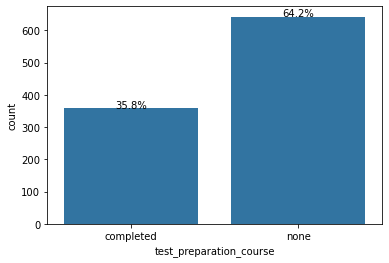

In [37]:
bar_chart_with_propotions(df, 'test_preparation_course')

In the above figures we plotted the distribution of the qualitative variables in the dataset. We observe the following about each variable:
- **Gender** : percentage of *males* and *females* students is very close.
- **race/ethnicity**: most students are from *group C*. And students from *group A* are the fewest of all groups.
- **parental level of education**: most parents have education less than *bachlero's degree*.
- **test preparation course**: only 1/3 of students took the course.


### Test scores

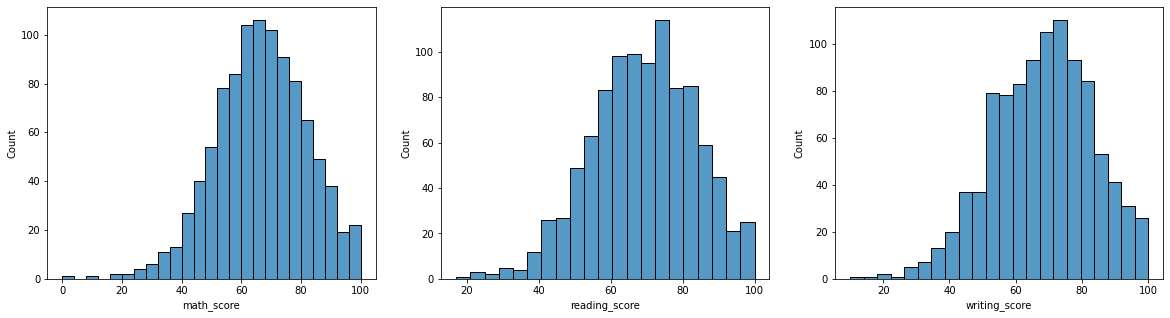

In [38]:
plt.figure(figsize = [20, 5]) 
plt.subplot(1, 3, 1) 
sb.histplot(data=df, x="math_score", color=base_color);
plt.subplot(1, 3, 2) 
sb.histplot(data=df, x="reading_score", color=base_color);
plt.subplot(1, 3, 3) 
sb.histplot(data=df, x="writing_score", color=base_color);

The distubtion of the three test aspect scores has close shape.

## Bivariate and multivariate analysis

Let's investigate the relationship between variables guided by the following research questions:

1. Do students who took the test preparation course achieve higher scores?
2. Do the students who took the test preparation course achive higher grade in certain aspect?
3. Do students with parents who have higher level of education achieve higher score?
4. Do the parental level of education affect whether the students take the test preparation course or not? #remove
5. Does lunch type affect the students score?
6. Are there students who achive much higher score on certain aspect (math/reading/writing) than the other aspects?
7. Is there a relationship between gender and certain test aspect?
8. Does ethnicity group have a relationship with grades?

### 1. Do students who took the test preparation course achieve higher total score?
- In order to answer this question, and some questions to follow we should do some **feature engineering**.
- The basic idea behind feature engineering is creating new variables as functions of existing variables in data.
- We Will introduce a new column to the dataset that contain the **total score** for students.

In [39]:
df['total_score'] = df[['math_score','writing_score', 'reading_score']].sum(axis =1)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


- Here we are investigating relationship between one quantitative (total score) and one qualitative (test preparation course) variable.
- So we will use box plots or violin plot to visualize the relationship.
- We will use violin plots as they show the density of variables, and in seaborn we can add summary statistics we can get from boxplot in violin plot by setting `inner='quartile'`

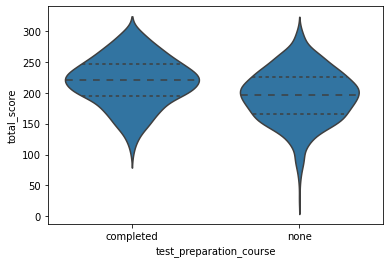

In [40]:
sb.violinplot(data=df, x='test_preparation_course', y='total_score', color=base_color, inner='quartile');

In [41]:
df.groupby('test_preparation_course').total_score.mean()

test_preparation_course
completed    218.008380
none         195.116822
Name: total_score, dtype: float64

- The plot above shows that students who has completed the test preparation course achieve higher average total grades.
- However the difference in means is not that large (218 average score for students who took the course vs 195 for students who didn't)
- The other observations that we can get from the plot is that more students with higher grades took the course, as the curve is wider at higer total scores.
- We can see that students with very low grades didn't take the course from the longtail in the plot.

### 2. Do the students who took the test preparation course achieve higher grade in certain aspect?
Here we are investigating relationship between one quantitative (score) and multiple qualitative (test preparation course) variables, so we will use violin plot too.

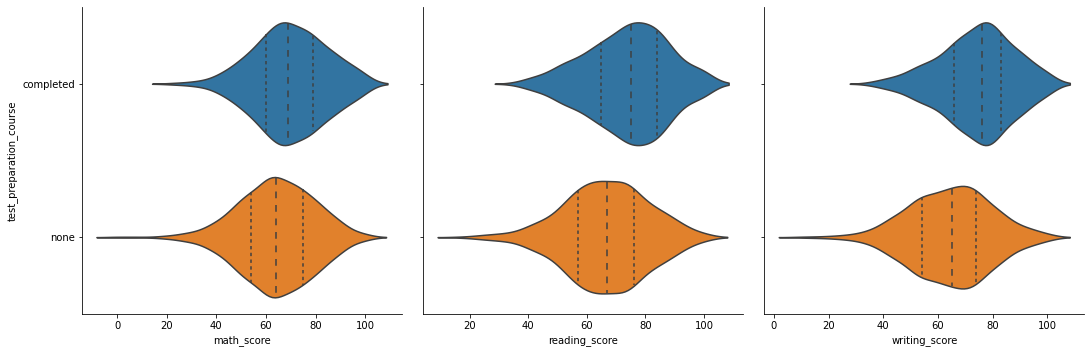

In [42]:
g = sb.PairGrid(data = df, x_vars = ['math_score', 'reading_score', 'writing_score'],
                y_vars = ['test_preparation_course'], height = 5,aspect = 1)
g.map(sb.violinplot, inner = 'quartile');

- The plots above show that the difference between writing and reading scores for students who took the course is more observable than the difference in maths score.
- So we can conclude that the test helped students who took it in the writing/reading sections of the exam but didn't improve their performance in math that much.


### 3. Do students with parents who have higher level of education achieve higher total score?

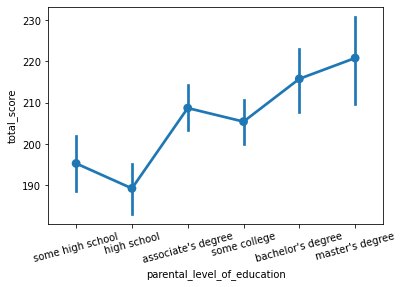

In [43]:
type_order = ["some high school","high school", "associate's degree", "some college", "bachelor's degree", "master's degree"]
sb.pointplot(data=df, x='parental_level_of_education', y='total_score', color=base_color, order=type_order);
plt.xticks(rotation=15);

From the above plot we see that if the parental education is better their children tend to achieve a better total score.

### 5. Does lunch type affect the students score?


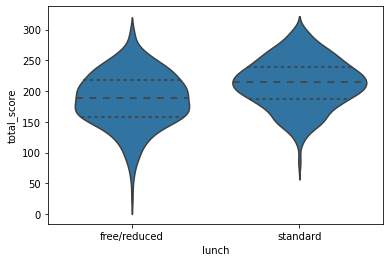

In [44]:
sb.violinplot(data=df, x='lunch', y='total_score', color=base_color, inner='quartile');

Student who have had standard lunch achieve higher total scores than students who had free/reduced lunch.

### 6. Are there students who achive much higher score on certain aspect (math/reading/writing) than the other aspects?

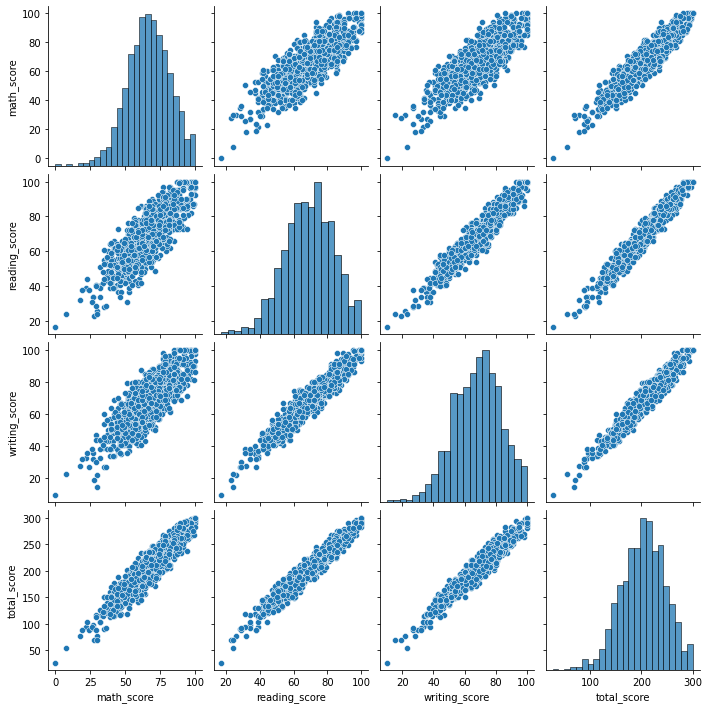

In [45]:
sb.pairplot(data=df);

From the above plot it is clear that scores in different aspects increase linearly with each other.

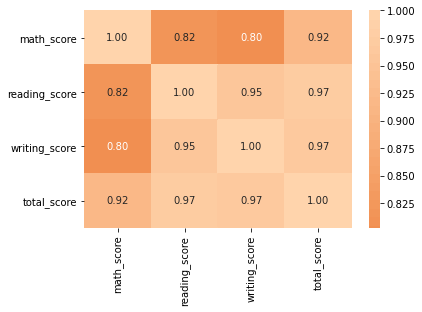

In [46]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', center = 0);

Points noted from above heatmap:
- High correlations between total_scores and individual_scores
- Writing_score and reading_score are also highly correlated which tells us that if a student reads well then he/she also writes well.
- Math_score doesn't have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa



### 7. Is there a relationship between gender and certain test aspect?

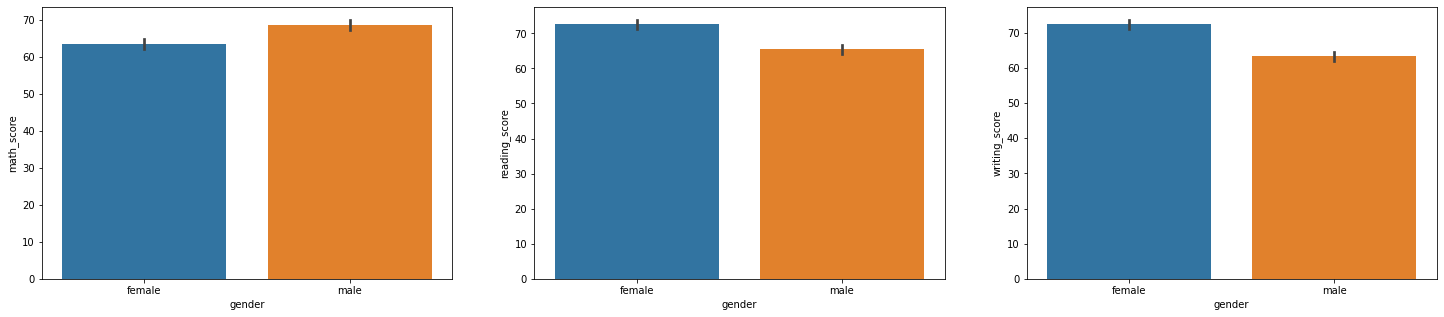

In [47]:
plt.figure(figsize = [25, 5]) 
plt.subplot(1, 3, 1)
sb.barplot(data=df, x='gender', y='math_score');
plt.subplot(1, 3, 2)
sb.barplot(data=df, x='gender', y='reading_score');
plt.subplot(1, 3, 3)
sb.barplot(data=df, x='gender', y='writing_score');


- From the above plots we can conclude that females perform better in reading and writing, while males perform better in maths.
- We saw earlier that the preparation test help students more in reading/writing sections, let's investigate wether there're more females who took the course or not.

In [48]:
df.groupby('gender').test_preparation_course.value_counts()

gender  test_preparation_course
female  none                       334
        completed                  184
male    none                       308
        completed                  174
Name: test_preparation_course, dtype: int64

There's no big difference between males and females in regarding taking the preparation test, so the difference in scores in different areas may be due to other factors.

### 9. Does ethnicity group have a relationship with grades

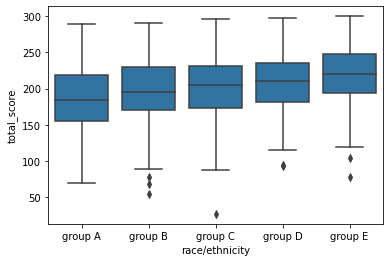

In [49]:
sb.boxplot(data=df, x='race/ethnicity', y='total_score', color=base_color);

In [50]:
df.groupby('race/ethnicity').total_score.mean()

race/ethnicity
group A    188.977528
group B    196.405263
group C    201.394984
group D    207.538168
group E    218.257143
Name: total_score, dtype: float64

The mean total score of group E is highest among all the groups while the average of group A is lowest.
Let's see if the race has relationship with the lunch.

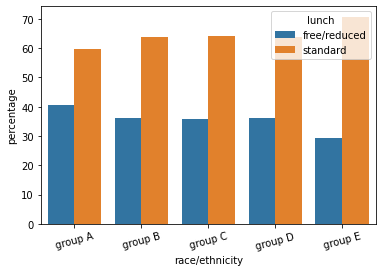

In [51]:
lunch_counts = (df.groupby(['race/ethnicity'])['lunch']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('lunch'))
sb.barplot(x="race/ethnicity", y="percentage", hue="lunch", data=lunch_counts)
plt.xticks(rotation=15);

From the above graph we can see that students from group E had the lowest free/reduced lunch percentage, and students from group A have the higest free/reduced lunch percentage. 

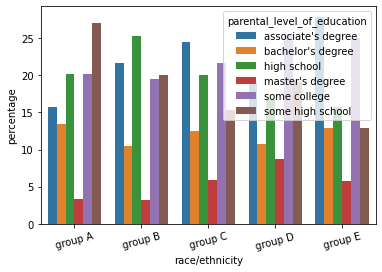

In [52]:
parental_level_of_education_counts = (df.groupby(['race/ethnicity'])['parental_level_of_education']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('parental_level_of_education'))
sb.barplot(x="race/ethnicity", y="percentage", hue="parental_level_of_education", data=parental_level_of_education_counts)
plt.xticks(rotation=15);


From the above graph we see that group E has the lowest percentage of parents who haven't finished high school or didn't go to college, and group A has the highest percentage of parents who didn't finish high school.

In [53]:
df.to_csv('StudentsPerformanceProcessed.csv', index=False)